In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-place-sales/pizza_types.csv
/kaggle/input/pizza-place-sales/orders.csv
/kaggle/input/pizza-place-sales/order_details.csv
/kaggle/input/pizza-place-sales/pizzas.csv


# **The Goal for this Analysis:**

We are going to use this dataset for Exploratory Data Analysis in which we will perform many functions and techniques. We will be using Numpy and Pandas libraries for data analysis, data manipulation and data cleaning, we will also use Matplotlib and Seaborn for data visualisation. And then summmarise all the inferences gained for better understanding.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Reading different datasets**

# **Orders Data**

In [3]:
df_order_details = pd.read_csv('/kaggle/input/pizza-place-sales/order_details.csv')
df_order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df_orders = pd.read_csv('/kaggle/input/pizza-place-sales/orders.csv')
df_orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [7]:
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders['time'] = pd.to_datetime(df_orders['time'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


# **Pizza Data**

In [8]:
df_pizza_types = pd.read_csv('/kaggle/input/pizza-place-sales/pizza_types.csv', encoding = 'latin1')
df_pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [9]:
df_pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [10]:
df_pizzas = pd.read_csv('/kaggle/input/pizza-place-sales/pizzas.csv')
df_pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [11]:
df_pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


# **Data Processing**

# **Merging the dataframes**

In [12]:
merge_df_orders = df_order_details.merge(df_orders, how = 'inner', on = ['order_id'])
merge_df_orders.head()
#In this code we are merging both dataframe using the order_id from both the dataframe.
merge_df_orders.info()
#As we can see there are no null values so there is no need for the data cleaning process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 2.2+ MB


In [13]:
merge_df_pizzas = df_pizza_types.merge(df_pizzas, how = 'inner', on = ['pizza_type_id'])
merge_df_pizzas.head()
#In this code we are merging both dataframe using the pizza_type_id from both the dataframe.
merge_df_pizzas.info()
#As we can see there are no null values so there is no need for the data cleaning process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_type_id  96 non-null     object 
 1   name           96 non-null     object 
 2   category       96 non-null     object 
 3   ingredients    96 non-null     object 
 4   pizza_id       96 non-null     object 
 5   size           96 non-null     object 
 6   price          96 non-null     float64
dtypes: float64(1), object(6)
memory usage: 5.4+ KB


# **Final Dataframe**

In [14]:
df_final = merge_df_pizzas.merge(merge_df_orders, how = 'inner', on = ['pizza_id'])
df_final.head()
#In this code we are merging both dataframe using the pizza_id from both the dataframe.
df_final.info()
#As we can see there are no null values so there is no need for the data cleaning process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_type_id     48620 non-null  object        
 1   name              48620 non-null  object        
 2   category          48620 non-null  object        
 3   ingredients       48620 non-null  object        
 4   pizza_id          48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   order_details_id  48620 non-null  int64         
 8   order_id          48620 non-null  int64         
 9   quantity          48620 non-null  int64         
 10  date              48620 non-null  datetime64[ns]
 11  time              48620 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [15]:
#Creating new columns for month and hour.
df_final['months'] = pd.to_datetime(df_final['date'], infer_datetime_format = True).dt.month
df_final['hours'] = pd.to_datetime(df_final['time'], infer_datetime_format = True).dt.hour
df_final.info()
#As we can see there are no null values so there is no need for the data cleaning process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_type_id     48620 non-null  object        
 1   name              48620 non-null  object        
 2   category          48620 non-null  object        
 3   ingredients       48620 non-null  object        
 4   pizza_id          48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   order_details_id  48620 non-null  int64         
 8   order_id          48620 non-null  int64         
 9   quantity          48620 non-null  int64         
 10  date              48620 non-null  datetime64[ns]
 11  time              48620 non-null  datetime64[ns]
 12  months            48620 non-null  int32         
 13  hours             48620 non-null  int32         
dtypes: datetime64[ns](2), 

In [16]:
#Sorting the values and setting the index of the dataframe
fdf = df_final.sort_values(by = ['order_details_id'])
fdf.set_index(['order_details_id'])

,pizza_type_id,name,category,ingredients,pizza_id,size,price,order_id,quantity,date,time,months,hours
order_details_id,,,,,,,,,,,,,
1,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",hawaiian_m,M,13.25,1,1,2015-01-01,2024-05-08 11:38:36,1,11
2,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",classic_dlx_m,M,16.00,2,1,2015-01-01,2024-05-08 11:57:40,1,11
3,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",five_cheese_l,L,18.50,2,1,2015-01-01,2024-05-08 11:57:40,1,11
4,ital_supr,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",ital_supr_l,L,20.75,2,1,2015-01-01,2024-05-08 11:57:40,1,11
5,mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",mexicana_m,M,16.00,2,1,2015-01-01,2024-05-08 11:57:40,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48616,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",ckn_alfredo_m,M,16.75,21348,1,2015-12-31,2024-05-08 21:23:10,12,21
48617,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",four_cheese_l,L,17.95,21348,1,2015-12-31,2024-05-08 21:23:10,12,21
48618,napolitana,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",napolitana_s,S,12.00,21348,1,2015-12-31,2024-05-08 21:23:10,12,21


# **Question 1 - Give the number of pizzas sold as per category and size.**

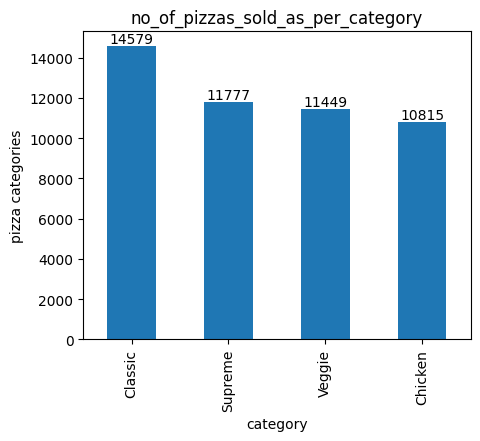

In [17]:
#no_of_pizzas_sold_as_per_category
no_of_pizzas_sold_as_per_category = fdf['category'].value_counts()
plt.title('no_of_pizzas_sold_as_per_category')
plt.ylabel('pizza categories')
ax = no_of_pizzas_sold_as_per_category.plot(kind = 'bar', figsize = (5,4))
for bars in ax.containers:
    ax.bar_label(bars)

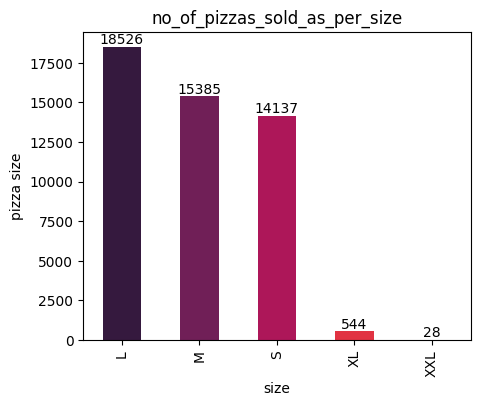

In [18]:
#no_of_pizzas_sold_as_per_size
no_of_pizzas_sold_as_per_size = fdf['size'].value_counts()
plt.title('no_of_pizzas_sold_as_per_size')
plt.ylabel('pizza size')
ax = no_of_pizzas_sold_as_per_size.plot(kind = 'bar', figsize = (5,4), color = sns.color_palette('rocket'))
for bars in ax.containers:
    ax.bar_label(bars)

# **Question 2 - Give the top 10 and least 10 pizzas sold.**

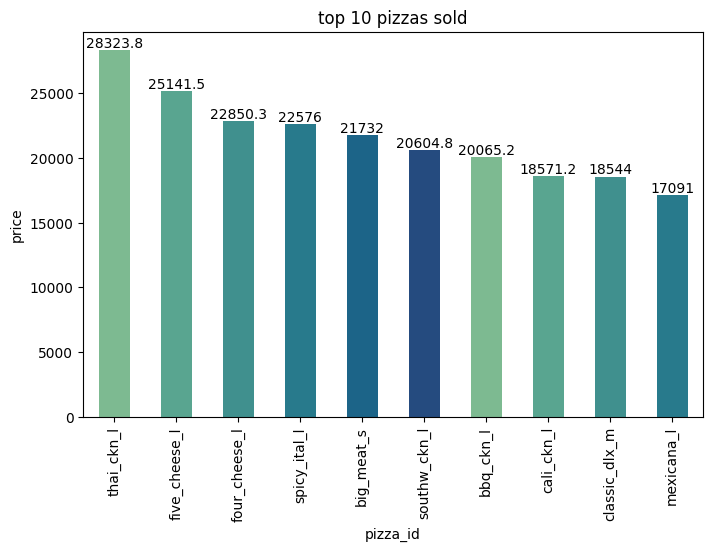

In [19]:
#here we are first grouping the data by pizza_id and sorting it by the sum of price. 
pizza_sales = fdf.groupby(['pizza_id'])['price'].sum().sort_values(ascending = False)
#Top 10 Pizzas Sold
plt.title('top 10 pizzas sold')
plt.ylabel('price')
ax = pizza_sales.head(10).plot(kind = 'bar', figsize = (8,5), color = sns.color_palette('crest'))
for bars in ax.containers:
    ax.bar_label(bars)

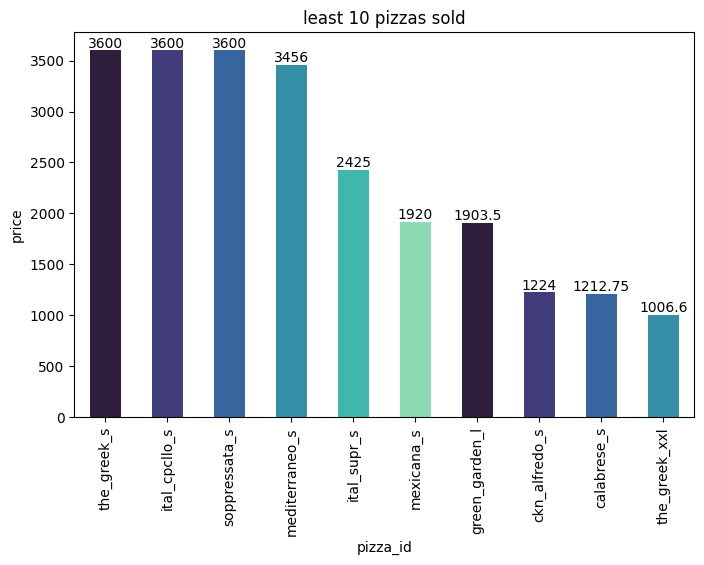

In [20]:
#Least 10 Pizzas Sold
plt.title('least 10 pizzas sold')
plt.ylabel('price')
ax = pizza_sales.tail(10).plot(kind = 'bar', figsize = (8,5), color = sns.color_palette('mako'))
for bars in ax.containers:
    ax.bar_label(bars)

# **Question 3 - How many customers do we have each day? Are there any peak hours?**

In [21]:
#showing the number of customers we have each day
customers_we_have_each_day = fdf['date'].value_counts()
print(customers_we_have_each_day)
#showing the number of customers we have on an average each day
customers_we_have_each_day_average = fdf['date'].value_counts().mean()
print('customers we have each day (average)', customers_we_have_each_day_average)

date
2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: count, Length: 358, dtype: int64
customers we have each day (average) 135.81005586592178


In [22]:
#showing the peak hours when the customers usually visit
peak_hours = fdf['hours'].value_counts().sort_values(ascending = False)
print(peak_hours)
#this shows that the peak hours are between 12 PM - 1 PM & 5 PM - 6 PM.

hours
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: count, dtype: int64


# **Question 4 - How many pizzas are typically in order? Do we have any bestsellers?**

In [23]:
#pizzas typically in order
fdf['quantity'].value_counts()
#here we can see that the pizzas tyically in order is 1, and rarely 4.

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

In [24]:
#any bestsellers
#for this we can categorise our sales intwo formats, one will be acc to the pizzas sold(revenue earned) and the other will be acc to the no. of pizzas ordered.
#top 5 pizzas sold by revenue
print('top 5 pizzas sold by revenue',pizza_sales.head(5))
#top 5 pizzas sold by no of them ordered
print('top 5 pizzas sold by no of them ordered',fdf['pizza_id'].value_counts().head(5))
#this shows that our bestsellers are thai_ckn_l, big_meat_s, four_cheese_l and five_cheese_l.

top 5 pizzas sold by revenue pizza_id
thai_ckn_l       28323.75
five_cheese_l    25141.50
four_cheese_l    22850.35
spicy_ital_l     22576.00
big_meat_s       21732.00
Name: price, dtype: float64
top 5 pizzas sold by no of them ordered pizza_id
big_meat_s       1811
thai_ckn_l       1365
five_cheese_l    1359
four_cheese_l    1273
classic_dlx_m    1159
Name: count, dtype: int64


# **Question 5 - How much money did we make this year? Can we identify any seasonality in the sales?**

money made this year 801944.7000000001


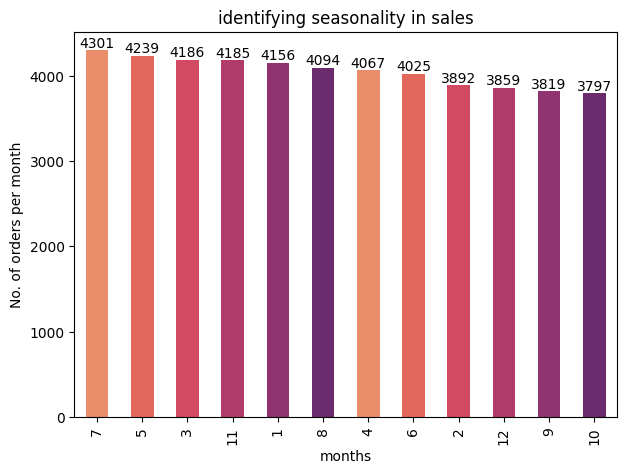

In [25]:
#money made this year
print('money made this year',fdf['price'].sum())
#identifying seasonality in sales
identifying_seasonality_in_sales = fdf['months'].value_counts().sort_values(ascending = False)
plt.title('identifying seasonality in sales')
plt.ylabel('No. of orders per month')
ax = identifying_seasonality_in_sales.plot(kind = 'bar', figsize = (7,5), color = sns.color_palette('flare'))
for bars in ax.containers:
    ax.bar_label(bars)
#here we can see that identifying a seasonaltiy in sales is a bit tough but the highest grossing sales for the outlet was in the month of julty followed by may.

#  **Question 6 - Are there any pizzas that we should take off the menu, or any promotions we could leverage?**

In [26]:
## let's see what are the least 10 pizzas sold by revenue and the least 10 pizzas ordered.
#least 10 pizzas soldby revenue
print('the 10 least pizzas sold are', pizza_sales.tail(10))
#least 10 pizzas ordered
print('the 10 least pizzas ordered are', fdf['pizza_id'].value_counts().sort_values(ascending = True).head(10))
#Here we can see that the_greek_xxl is the pizza that has been least sold in terms of revenue and orders so it should be taken offf the menu.

the 10 least pizzas sold are pizza_id
the_greek_s       3600.00
ital_cpcllo_s     3600.00
soppressata_s     3600.00
mediterraneo_s    3456.00
ital_supr_s       2425.00
mexicana_s        1920.00
green_garden_l    1903.50
ckn_alfredo_s     1224.00
calabrese_s       1212.75
the_greek_xxl     1006.60
Name: price, dtype: float64
the 10 least pizzas ordered are pizza_id
the_greek_xxl      28
green_garden_l     94
ckn_alfredo_s      96
calabrese_s        99
mexicana_s        160
ckn_alfredo_l     187
ital_veggie_l     190
ital_supr_s       194
the_greek_l       255
spinach_supr_m    266
Name: count, dtype: int64


# **Conclusion :-**

1.The pizza place sold a large number of pizzas in 2015 making a revenue of $801945.

2.Customers generally like to order their pizzas from classic category in large size and quantifying to 1 in general and 4 in rare cases.

3.Customer generally visit the place at 12 PM - 1 PM & 5 PM - 6PM making them their peak hours and having an average customer of 135.

4.The highest number of sales or the place was in the month of july and followed by may.

5.The_Greek_Xxl should be taken off the menu asit is the least sold pizza in terms of revenue and orders.